<a href="https://colab.research.google.com/github/matthew-ferreira/FrequentistML/blob/main/Ferreira_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[23.64706697 26.62315438 27.49279122 24.71131353 23.35819541 23.65583967
 25.08021667 25.10566989 24.64726788 24.16153506]
4


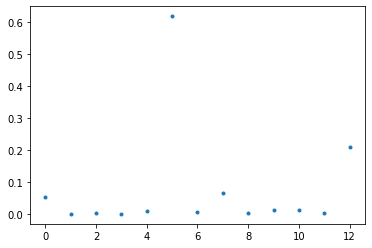

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

X, y = load_boston(return_X_y=True)
boston = load_boston()
X_test      =   X[506-51:]
X_validate  =   X[506-102:506-51]
X_train     =   X[:404]

y_test      =   y[506-51:]
y_validate  =   y[506-102:506-51]
y_train     =   y[:404]

regr = RandomForestRegressor(max_depth=5, random_state=0)
scores = np.zeros(10)
for i in range(10):
  regr.set_params(n_estimators = (i+1)*20)
  regr.fit(X_train,y_train)
  y_hat_validate = regr.predict(X_validate)
  scores[i] = mean_squared_error(y_validate, y_hat_validate)

print(scores)

s = np.argmin(scores)
print(s)

regr.set_params(n_estimators = (s+1)*20)
regr.fit(X_train,y_train)
y_hat_test = regr.predict(X_test)
mean_squared_error(y_test,y_hat_test)

plt.plot(regr.feature_importances_,'.')